## Define Problem Statement: 

## Load Dataset

In [32]:
import pandas as pd

# Load the dataset
file_path = 'Dataset_CyberCrime_Sean.csv'
data = pd.read_csv(file_path)


## Explore Dataset

In [33]:
# Check basic information about the dataset
print(data.info())

# Display the first few rows of the dataset
print(data.head())

# Check for missing values in each column
print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   City                         190 non-null    object 
 1   Personal Revenge             190 non-null    float64
 2   Anger                        190 non-null    float64
 3   Fraud                        190 non-null    float64
 4   Extortion                    190 non-null    float64
 5   Causing Disrepute            190 non-null    float64
 6   Prank                        190 non-null    float64
 7   Sexual Exploitation          190 non-null    float64
 8   Disrupt Public Service       190 non-null    float64
 9   Sale purchase illegal drugs  190 non-null    float64
 10  Developing own business      190 non-null    float64
 11  Spreading Piracy             190 non-null    float64
 12  Psycho or Pervert            190 non-null    float64
 13  Steal Information   

## Data Cleaning

In [34]:
# Drop rows where the target variable 'Total' is missing
data = data.dropna(subset=['Total'])

# Fill missing values in other columns with 0
data = data.fillna(0)
print(data.isnull().sum())


City                           0
Personal Revenge               0
Anger                          0
Fraud                          0
Extortion                      0
Causing Disrepute              0
Prank                          0
Sexual Exploitation            0
Disrupt Public Service         0
Sale purchase illegal drugs    0
Developing own business        0
Spreading Piracy               0
Psycho or Pervert              0
Steal Information              0
Abetment to Suicide            0
Others                         0
Total                          0
dtype: int64


## Feature Engineering

In [35]:
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = data.drop(['City', 'Total'], axis=1)  # Features
y = data['Total']  # Target

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## Split Data

In [36]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


## Select Models

1. Linear Regression

Linear Regression R-squared: 1.00
Linear Regression MSE: 307.61


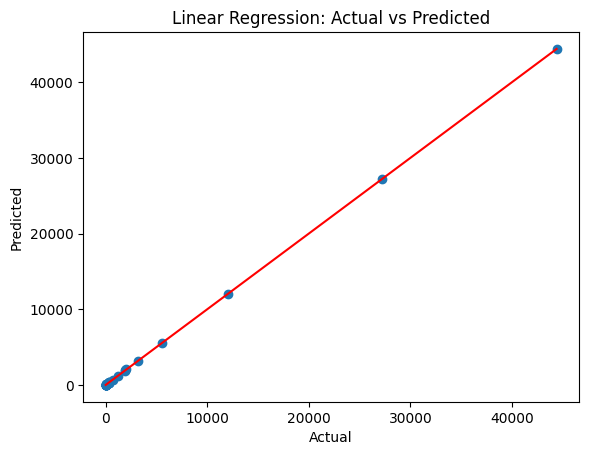

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import matplotlib.pyplot as plt

# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Performance Metrics
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression R-squared: {r2_lr:.2f}")
print(f"Linear Regression MSE: {mse_lr:.2f}")

# Plotting
plt.scatter(y_test, y_pred_lr)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title("Linear Regression: Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

2. Decision Tree Regressor

Decision Tree MSE: 1213658.74
Decision Tree R-squared: 0.98


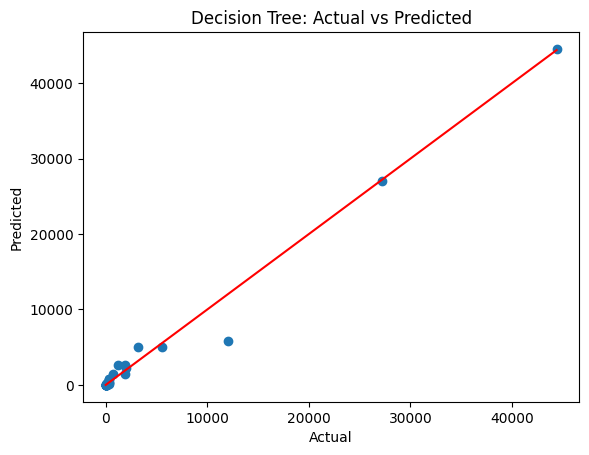

In [38]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Decision Tree Model
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Performance Metrics
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree MSE: {mse_dt:.2f}")
print(f"Decision Tree R-squared: {r2_dt:.2f}")

# Plotting
plt.scatter(y_test, y_pred_dt)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title("Decision Tree: Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

3. Random Forest Regressor

Random Forest MSE: 587787.83
Random Forest R-squared: 0.99


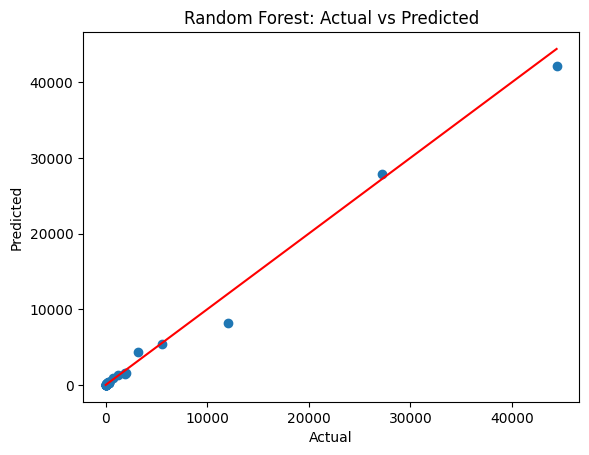

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Random Forest Model
rf_model = RandomForestRegressor(max_depth=20, min_samples_split=2, n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Performance Metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest MSE: {mse_rf:.2f}")
print(f"Random Forest R-squared: {r2_rf:.2f}")

# Plotting
plt.scatter(y_test, y_pred_rf)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title("Random Forest: Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()


## Train Model

In [40]:
# Train the Random Forest model on the training data
model = RandomForestRegressor(max_depth=20, min_samples_split=2, n_estimators=200, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=200, random_state=42)

## Evaluate Model

Mean Squared Error: 587787.83


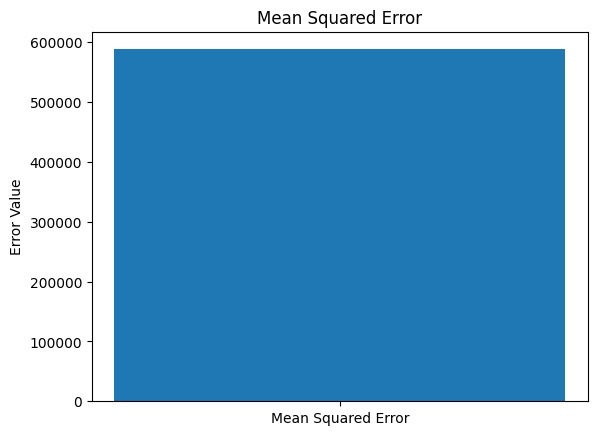

In [41]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
plt.bar(['Mean Squared Error'], [mse])
plt.ylabel('Error Value')
plt.title('Mean Squared Error')
plt.show()

R-squared: 0.99


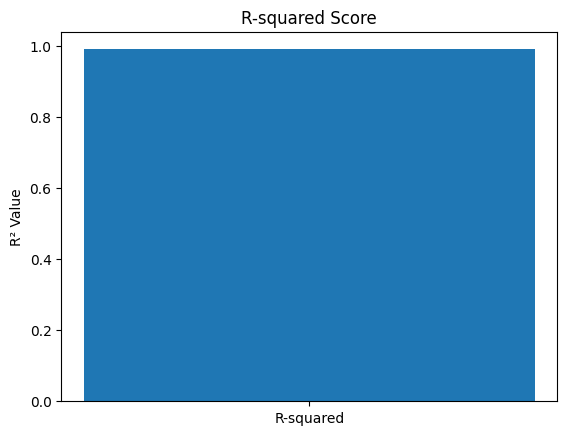

In [42]:
import matplotlib.pyplot as plt

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.2f}")

plt.bar(['R-squared'], [r2])
plt.ylabel('R² Value')
plt.title('R-squared Score')
plt.show()

## Make Predictions

In [44]:
import joblib

# Save the trained model and scaler
model_filename = "best_random_forest_model.pkl"
scaler_filename = "scaler.pkl"
joblib.dump(model, model_filename)
joblib.dump(scaler, scaler_filename)

def load_model_and_predict_city():
    # Load the saved model and scaler
    loaded_model = joblib.load(model_filename)
    loaded_scaler = joblib.load(scaler_filename)
    
    # Prompt user for city name
    city_name = input("Enter the city name: ")
    
    # Retrieve and preprocess data for the selected city
    city_data = data[data['City'] == city_name]
    
    if city_data.empty:
        print(f"City '{city_name}' not found in the dataset.")
        return
    
    city_features = city_data.drop(['City', 'Total'], axis=1)
    scaled_city_features = loaded_scaler.transform(city_features)
    
    # Predict total crimes
    predicted_total_crimes = loaded_model.predict(scaled_city_features)[0]
    
    # Calculate crime category percentages
    total_category_crimes = city_features.iloc[0]
    category_percentages = (total_category_crimes / total_category_crimes.sum()) * 100
    
    # Sort categories by percentage in descending order
    sorted_categories = category_percentages.sort_values(ascending=False)
    
    # Display results
    print(f"\nPredicted Total Crimes for {city_name}: {int(predicted_total_crimes)}")
    print("\nPercentage Breakdown of Crimes by Category:")
    
    for category, percentage in sorted_categories.items():
        if percentage > 0 and category != 'Others':
            print(f"  {category}: {percentage:.2f}%")
    
    if 'Others' in sorted_categories and sorted_categories['Others'] > 0:
        print(f"  Others: {sorted_categories['Others']:.2f}%")

# Call the function to get predictions for a city
load_model_and_predict_city()



Predicted Total Crimes for Agra: 73

Percentage Breakdown of Crimes by Category:
  Fraud: 27.14%
  Personal Revenge: 7.14%
  Others: 65.71%
